<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# LECTURE 2

This lecture will cover the various distributions that we often use when trying to perform statistical analyses of data. It may come as a surprise, but in our daily lives the behavior of nearly everything can be written down into just a few different probability distributiosn, and even crazier, all of these distributions are closely related. This lecture will go over these different distributions. Furthermore, we will review the finer points of these distributions, that will come back again and again throughout data science. The main points we will cover are : 

<!--start-block-->
<hr style="height: 1px;">

### 2.0 Learning Objectives
In this lecture we will explore the following objectives:

- Binomial Distributions  
- Poisson Distributions  
- Normal Distributions   
- Propagating Uncertainties

The goal of this lecture is to understand the properities of distributions, and why these distributions appear in data analyssis over and over again. By the end of this class, you will understand what these distributions are, and how to use the `scipy.stats` library to process these distributions. 


<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 2.1 Binomial distributions

<img src="https://external-preview.redd.it/Kt_QUdsFmAI4v9hPw-JbYA2wC9blaF8iIvnVdla2aaE.jpg?auto=webp&s=da7915bb8a27e47d88adaf6f58bab193b7d1f35f" width="500"/>

Often we perform measurements having some probability. Lets say we perform many measurements each with the same probability. What will be our distribution?  Since this is a physics class, we will not go into the depth of the math behind this, but let's at least walk through a basic derivation.

<!--start-block-->

Let's say you flip a coin 10 times and the probability of heads is $p$. Let's say 3 times you get a heads distribution. That means the other 7 times you got a tails distribution.  
* What are the number of different cases there are 3 heads?

In this case we have 3 heads out of 10 flips so we have have $_{10}C_{3}=\frac{10!}{3!7!}=120$ ([details](https://en.wikipedia.org/wiki/Combination)). As a brief reminder of how this works, there are $10!$ different ordered combinations of numbers 1 through 10. Lets say we identify 3 of those 10 digits as special for whatever reason (e.g. lets take the first 3 digits). Then there are $3!$ ways to order these digits (e.g. (1,2,3),(1,3,2),....) and there are $7!$ ways to order the remaining 7 digits. As a consquence for all 10 digits, there are $_{10}C_{3}$ different ways to order a group of 3, and 7 digits combined where the 3 and 7 digits are distinct from one another (ie 1,2,3 is heads and 4...10 is tails). More generally, we have for $n$ flips and $m$ cases the total number of combinations will be written as $\frac{n!}{m!(n-m)!}$. 

* What is the probability of this scenario?

 * Each flip of the coin has equal probability giving heads. Lets say that this probability is $p$. To get one head and one tail in two flips  the probability would be the multiplicative probability to get a head  ($p$) and a tails ($(1-p)$) then $\times$ by the number of distinct combinations that would give you a heads and a tails. In this case, the number of combinations is $2$, a heads first and a tails second, *or* a tails frist and a heads second. This yields a total probability of $p(1-p)\times N_\mathrm{combo}=2p(1-p)$.

 * In the case where there are 3 heads, the probability is the probability of 3 heads $p^{3}$ and the probability of 7 no heads $(1-p)^{7}$ and for $n$ flips and $m$ cases we have $p^{m}(1-p)^{n}\times N_\mathrm{combo}$. 

* What is the distribution?
 * If we combine everything for our specific case, we have $_{10}C_{3}\times p^3(1-p)^7$ 
 * Putting everything together we have the binomial distribution as a function of $p$ given by $f(m)=p^{m}(1-p)^{n}\frac{n!}{m!(n-m)!}$

Lets actually compute this for a few cases?

In [5]:
import numpy as np
from scipy.special import comb
print("Test comb:",comb(2,1),"True: 2",comb(3,2),"True: 3",comb(10,3),"True: 120")

#for p=0.5, what is the probabiity of 3 heads out of 10 draws?
def prob(p=0.5,nheads=3,ntotal=10):
    pheads=np.power(p,nheads)
    ptails=np.power(p,ntotal-nheads)
    combos=comb(ntotal,nheads)
    return combos*ptails*pheads

print("Probability of 3 heads in 10 draws is:",prob(nheads=3,ntotal=10))
#Question, plot the probability of 3 heads out of 10 for varying probability value, why is the shape like that?

Test comb: 2.0 True: 2 3.0 True: 3 120.0 True: 120
Probability of 3 heads in 10 draws is: 0.1171875


In [3]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()

Out of all of this math, we have derived the binomial distribution. This is the first emperical distribution we will need for this class. In fact, all of the other distributions we will study are built upon the binomial distribution. Let's compute the expectation and variance of this distribution, first we can define the distribution.
\begin{equation}
f(p,n,m) = \frac{n!}{m!(n-m)!}p^{m}(1-p)^{n-m}\\
\end{equation}
Now let's compute the expectaion over $m$ for $p$ and $n$ fixed, defined as $E[m;p,n]$ the semicolon denotes fixed. 
\begin{equation}
E[m;p,n]=\int_0^{n} p^{m}(1-p)^{n}\frac{n!}{m!(n-m)!} \mathrm{heads}(m) dm \\
\end{equation}
Where $\mathrm{heads}(m)$ is a function that we define as the expected value given a heads or tails observation. In this case, we will define this function as $1$ for heads and $0$ for tails. This is a complicated form, but in the case of just just choosing, one head we have. 
\begin{equation}
E[m;p,n=1]= p\times1+(1-p)\times0\\
E[m;p,n=1]= p
\end{equation} 

Now lets introduce a new function that is defined as the sum of $n$ individual experiments, we can define the function $f(x)=\sum_{i} \rm{heads}(x_{i})$. The expectation for this is
\begin{eqnarray}
E[f(x)]&=&\sum_{0}^{n} p\times 1+(1-p)\times 0 \\
E[f(x)]&=&np\\
\end{eqnarray}
That means the average value over $n$ tries $\bar{x}=f(x)/n=p$ or its just the value $p$. 

In a similar way we can define the variance as: 
\begin{eqnarray}
V[f(x)]&=&\sum_{i=0}^{n} (x-\mu)^2 \\
V[f(x)]&=&\sum_{i=0}^{n} p\times(1-\mu)^2 + (1-p) \times (0-\mu)^2 \\
V[f(x)]&=&\sum_{i=0}^{n} p \times (1-p)^2 + (1-p) \times (0-p)^2 \\
V[f(x)]&=&\sum_{i=0}^{n} (1-p)\times (p^2 +p(1-p))  \\
V[f(x)]&=&\sum_{i=0}^{n} (1-p)\times p   \\
V[f(x)]&=&np(1-p)
\end{eqnarray}
or in other words, we consider performing $n$ independent measurements, we can compute the variance over this distribution as $V[f(x)/n]=V[f(x)]/n=p(1-p)$

It's all fun to do math, but the point of this class is to do it with computers, so let's do the same derivations numerically. Note we plot these as discrete lines rather than continuous points, since the binomial distribution is discrete and only defined for discrete numbers. 


In [4]:
#We are going to use scipy stats package
import scipy.stats as stats
import matplotlib.pyplot as plt
n=30
p=0.25
#Scipy has a binomial, but since this is a discrete distribution we use pmf (probability mass function) rather than pdf
k=np.arange(0,n)
binomial=stats.binom.pmf(k,n,p)
#let's get the integral of this guy
norm=0
exp=0
var=0
for i0 in range(n):
    norm+=stats.binom.pmf(i0,n,p)
    exp+=i0*stats.binom.pmf(i0,n,p)
for i0 in range(n):
    pVal=stats.binom.pmf(i0,n,p)
    var+=(i0-exp/norm)*(i0-exp/norm)*pVal

#Print it out
print("norm:",norm,"expectation:",exp/norm,"Var:",var/norm)
#Now lets check with the expectation
print("norm: 1.000000, expectation:",n*p,"Var:",n*p*(1-p))

plt.plot(k,binomial,'o')
plt.vlines(k,0, binomial)
plt.ylim(bottom=0)

plt.xlabel("Number of successes")
plt.ylabel("Probability")
plt.show()

NameError: name 'np' is not defined

Now, let's actually do some more difficult problems that flipping a coin. Also, lets actually think about this in a real life setting. Lets say that you are observing [fast radio bursts](https://en.wikipedia.org/wiki/Fast_radio_burst), and based on the wikipedia page [here](https://en.wikipedia.org/wiki/List_of_fast_radio_bursts) you observe about 19 fast radio bursts per year. What is the probability that you observe 2 fast radio bursts (FRB) within a day of each other? 

The trick to this problem is think of each day as flipping a coin. Where the probability of heads is instead the probability of finding a FRB. We can caculate the average probability by noting that over a period 365 days (i.e. 365 experiments), we see 19 FRBs, or in other words:
\begin{eqnarray}
E[f(x;n=365)]&=&np \\
             &=&19 \\
             &=&365\times p \\
            p&=&\frac{19}{365}
\end{eqnarray}
So the probability of $2$ in a row is just 0.3\%(see below). Moreover the probability of 2 observations in 7 days is (see below) 4.3%.

In [3]:
def prob(ndays=2,nobs=2,p=19/365):
    return stats.binom.pmf(nobs,ndays,p)

print("2 observations in 2 days:",prob())
print("2 observations in 7 days:",prob(7))
print("19 observations in 365 days:",prob(365,19))

2 observations in 2 days: 0.0027097016325764675
2 observations in 7 days: 0.043556897644653154
19 observations in 365 days: 0.0935904593189389


Now, lets ask the important physics question. Let's say you observed 2 FRBs back to back, given the probability of this occurance is so rare, is something else happening in the universe? [Read here](https://en.wikipedia.org/wiki/Fast_radio_burst#FRB_201124)

Secondly, why is the probability of 19 observations in 365 days so low? (only 10%). To understand this let's make a plot. 

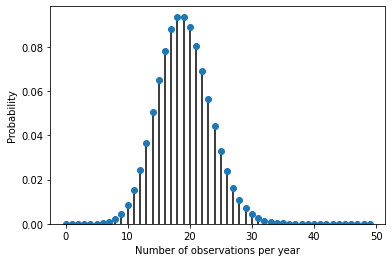

In [7]:
p=19/365
n=365
k=np.arange(0,50)
binomial=stats.binom.pmf(k,n,p)

def plotBinomial(iX,iBinomial,label='Binomial',color='black'):
    plt.plot(iX,iBinomial,'o')
    plt.vlines(iX,0, iBinomial,label=label,color=color)
    plt.ylim(bottom=0)
    plt.xlabel("Number of observations per year")
    plt.ylabel("Probability")

plotBinomial(k,binomial)

Getting exatly 19 observations is unlikely because there is variation. What we really want to do is integrate the number of observations that are either greater or less than 19. This is the cumulative distribution function. 
\begin{equation}
\mathrm{CDF}(\mathrm{binomial}(x)) = \int_x^{\infty} \mathrm{binomial}(u;p,k) du 
\end{equation}
the nice thing is that this is all built into our statistics code, lets plot it. 

cdf at 19: 0.5606290918166824


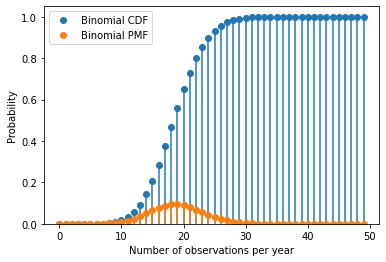

mean: 18.999999980557174 stddev: 4.243931938945149


In [8]:
p=19/365
n=365
k=np.arange(0,50)
binomial=stats.binom.pmf(k,n,p)
binomialcdf=stats.binom.cdf(k,n,p)
print("cdf at 19:",stats.binom.cdf(19,n,p))

plt.plot(k,binomialcdf,'o', label="Binomial CDF")
plt.vlines(k,0, binomialcdf, color=plt.gca().lines[-1].get_color())
plt.ylim(bottom=0)

plt.plot(k,binomial,'o', label="Binomial PMF")
plt.vlines(k,0, binomial, color=plt.gca().lines[-1].get_color())
plt.ylim(bottom=0)

plt.xlabel("Number of observations per year")
plt.ylabel("Probability")
plt.legend()
plt.show()


mean = np.average(k, weights=binomial)
variance = np.average((k-mean)**2, weights=binomial)
print("mean:",mean,"stddev:",np.sqrt(variance))


So now we see clearly the CDF is at approximately 50%. It's not exactly 50% for the simple fact that this is a discrete distribution. However the expectation wil be at exactly 19. 

### Challenge question
Lets do another related problem. With the current rate of gravitataional wave (GW) detection we observe a GW once per week. What is probability of 3 or more graviational waves in one week? Plot the distribution. Additionally, what is the distribution for GW events over the whole year, and the mean and variance? 

binomial: 0.06522913800493721


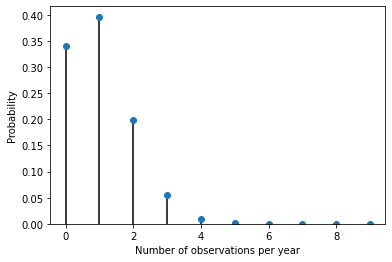

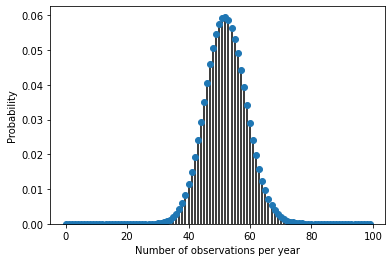

mean: 52.142857140170946 stddev: 6.685347965727253


In [32]:
import scipy.stats as stats
#solution
n=7.
p=1./7.
k=np.arange(0,10)
binomial=stats.binom.pmf(k,n,p)
total1=0
for i0 in range(len(k)):
    if k[i0] > 2:
        total1+= binomial[i0]
print("binomial:",total1)

plotBinomial(k,binomial)
plt.show()

#now what about for GWs in a year
n=365. #we don't need to divide by day!
p=1/7.
k=np.arange(0,100)
binomial=stats.binom.pmf(k,n,p)

plotBinomial(k,binomial)
plt.show()

average  = np.average(k, weights=binomial)
variance = np.average((k-average)**2, weights=binomial)
print("mean:",average,"stddev:",np.sqrt(variance))

hide_toggle()

<!--start-block-->
<hr style="height: 1px;">

## 2.2 Poisson distribution

The ugly thing about the binomial distribution is that it has these damn factorials. One way to get rid of the factorials is to do an approximation of the binomial distribution. We can define this by taking a limit over the number of experiments going to infinity $n\rightarrow\infty$. To do this we
\begin{equation}
{\rm define~} \lambda = \lim_{n\rightarrow\infty} np \rightarrow p=\frac{\lambda}{n} \\
\end{equation}

Now in this limiting case, we can replace the binomial distribution with an approximate form that has less factorials:
\begin{eqnarray}
\lim_{n\rightarrow\infty}\frac{n!}{m!(n-m)!}p^{m}(1-p)^{n} & = & \frac{n(n-1)...(n-m)}{m!}\left(\frac{\lambda}{n}\right)^{m}\left(1-\frac{\lambda}{n}\right)^{n} \\
&\approx&\frac{n^m}{m!}\frac{\lambda^{m}}{n^{m}}\left(1-\frac{\lambda}{n}\right)^{n} \\
&\approx&\frac{\lambda^{m}}{m!}e^{-\lambda} \\
f(m;\lambda=np) & = & \frac{\lambda^{m}}{m!}e^{-\lambda}
\end{eqnarray}
This form is known as the Poisson distribution, and is achieved by taking the binomial distribution to the large $n$ limit. We still have a pesky factorial, but one factorial is better than three factorials. 

Since, we can treat the Poisson distribution just like the binomial distribution. We can use the above computations for the mean and variance of $n\rightarrow\infty$ experiments sampling a poission distribution as (noting $p\rightarrow0$ in the large $n$ limit)
\begin{equation}
E[f(x)]=\lambda \\
V[f(x)]=\lambda
\end{equation}
What is most important from this observation is that the standard deviation of the distribution goes as the $\sqrt{\lambda}$ or root of the mean of the distribution. This will play a critical role going forward. 

Now let's see how it compares to a binomial in our previous plots. Lets use our FRB example $p=19/365$. Alternatively, lets also consider the probability of a sunny day in Boston $p=200/365$.

<br>
<!--end-block-->

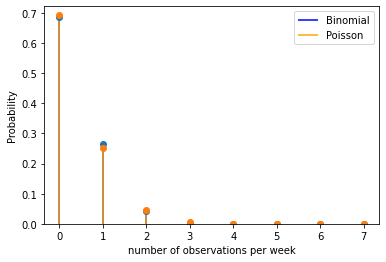

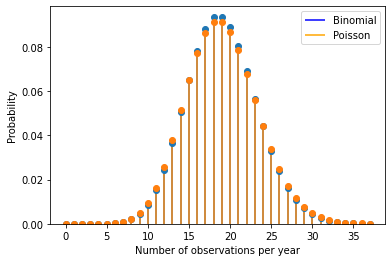

Yearly Binomial mean: 18.999062127754396 stddev: 4.241837723509582
Yearly Poisson mean: 18.99840654567745 stddev: 4.355424414310838


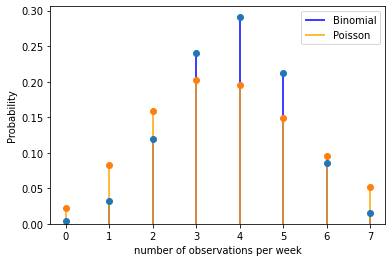

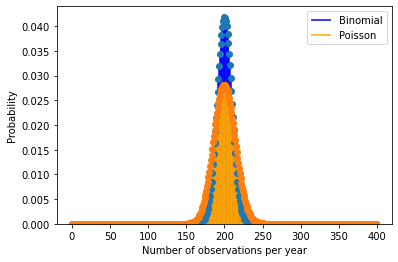

Yearly Binomial mean: 200.00000000000014 stddev: 9.50846774744007
Yearly Poisson mean: 199.9999999999999 stddev: 14.1421356237309


In [8]:
#Lets make a function for plotting
def plotWeekYear(p):
    #Week comparison
    n=7
    k=np.arange(0,n+1)
    binomial_week=stats.binom.pmf(k,n,p)
    poisson_week=stats.poisson.pmf(k,n*p)#note we give lambda=n*p
    plotBinomial(k,binomial_week,label='Binomial',color='blue')
    plotBinomial(k,poisson_week,label='Poisson',color='orange')
    plt.legend(loc='upper right')
    plt.xlabel('number of observations per week')
    plt.show()

    n=365
    k=np.arange(0,2*p*n)
    binomial_year=stats.binom.pmf(k,n,p)
    poisson_year=stats.poisson.pmf(k,n*p)#note we give lambda=n*p
    plotBinomial(k,binomial_year,label='Binomial',color='blue')
    plotBinomial(k,poisson_year,label='Poisson',color='orange')
    plt.legend(loc='upper right')
    plt.show()

    average  = np.average(k, weights=binomial_year)
    variance = np.average((k-average)**2, weights=binomial_year)
    print("Yearly Binomial mean:",average,"stddev:",np.sqrt(variance))
    
    average  = np.average(k, weights=poisson_year)
    variance = np.average((k-average)**2, weights=poisson_year)
    print("Yearly Poisson mean:",average,"stddev:",np.sqrt(variance))

    
#First FRBs
p=19/365
plotWeekYear(p)
#Now lets do sunny days
p=200/365
plotWeekYear(p)

So we see that the poisson approximation is really quite good for the case where the $p\ll1$. However, when $p$ is large and the number of events is small, we can be quite off. Just look at the number of sunny days per week. The binomial distributions gives about two percent vs nearly eight percent. This is a dramatic difference. Which one of these is correct for weather? (Answer: neither are good because weather from the previous day tells you about the current, its not a random process on the day to day level)

### Challenge question
Compare Poisson for gravitational wave observations, how off will you be if you approximate this effect with a Poisson? 

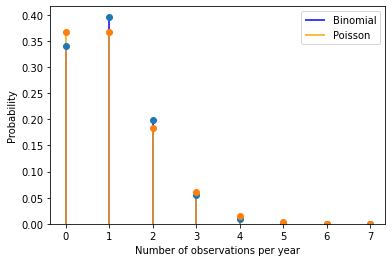

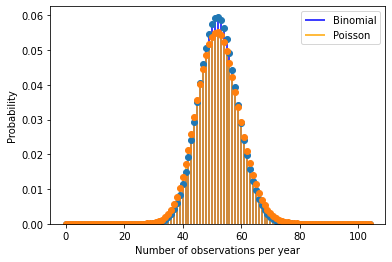

Yearly Binomial mean: 52.14285714281767 stddev: 6.685347975157542
Yearly Poisson mean: 52.14285713841788 stddev: 7.221001101524176


In [36]:
#Answer
#Now with the current rate of Gravitataional wave detection we observe a GW once per week
#What is probability of 3 or mroe graviational waves in one week
#In this case this is the probability of 3 random events happening in a short period of time, since we know 
#One way to phrase this is that the probability of a GW on a day is 1/7 and we hvae 7 days in a week
#What is the probability of 3 or more. The distribution for this is
n=7.
p=1./7.
plotWeekYear(p)
hide_toggle()

Now, why are we spending so much time on Poisson distributions. Let's say I have a distribution that is flat and I sampled from that distribution 10000 times, and then made a histogram with 100 bins. Lets make a distribution like that? 

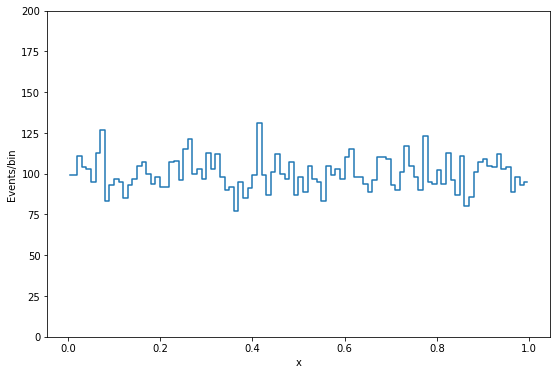

In [37]:
fig, ax = plt.subplots(figsize=(9,6))
N=10000
nbins=100
sample  = np.random.uniform (0,1,N)

def plotHist(iSample,iNBins):
    histy, bin_edges = np.histogram(iSample, bins=iNBins)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    ax.set_ylim([0,2*N/nbins])
    plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
    plt.xlabel("x")
    plt.ylabel("Events/bin")
    plt.show()
    return bin_centers, histy

_,_ = plotHist(sample,nbins)

What is the variation of each of these bins? To think about this, each sampling has a 1/100 probability of being in any one of those bins. 

Let's look at the mean and variance over teh bins. What is the distribution of the variations over these bins? 


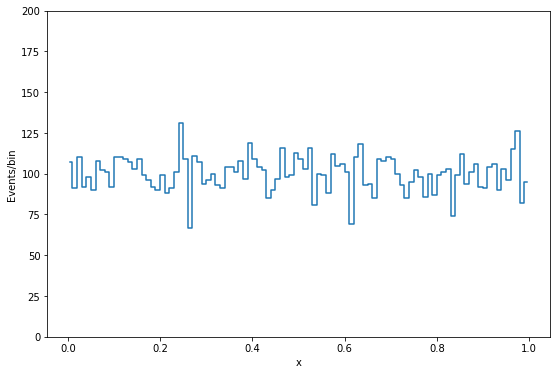

Actual mean: 100.00266666666664 Variance: 112.90897066666665
Poisson mean: 99.99934585710345 Variance: 99.96911275895653


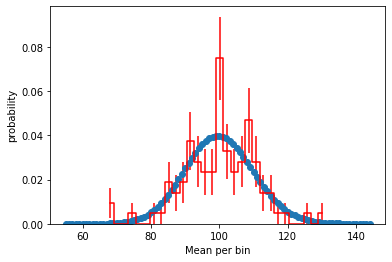

In [40]:
#Solution
#copy and past above distribution
fig, ax = plt.subplots(figsize=(9,6))
N=10000
nbins=100
sample  = np.random.uniform (0,1,N)
histx, histy = plotHist(sample,nbins)


def normhist(iVars,iNbins=30,iNormalize=True):
    y0, bin_edges = np.histogram(iVars, bins=iNbins)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    norm0 = 1 
    if iNormalize:
        norm0=len(iVars)*(bin_edges[-1]-bin_edges[0])/iNbins
    plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,drawstyle = 'steps-mid',c='red')
    return bin_centers,y0,bin_edges

residx,residy,_=normhist(histy)
haverage  = np.average(residx, weights=residy)
hvariance = np.average((residx-haverage)**2, weights=residy)
print("Actual mean:",haverage,"Variance:",hvariance) 

#Now since we have 100 bins with p=1/100 and we sample 1000 times we have lamb=np= N (1/nbins)
lamb=N/nbins
k=np.arange(0.55*N/nbins,1.45*N/nbins)
poisson=stats.poisson.pmf(k,lamb)
paverage  = np.average(k, weights=poisson)
pvariance = np.average((k-paverage)**2, weights=poisson)
print("Poisson mean:",paverage,"Variance:",pvariance)

plt.plot(k,poisson,'o')
# plt.vlines(k,0, poisson)
plt.ylim(bottom=0)

plt.xlabel("Mean per bin")
plt.ylabel("probability")
plt.show()

Now this brings us to a very important plot. If we have a histogram with $N$ events what are the fluctuations in that bin? 

If it is Poisson, then the variance is going to be $N$ and the standard deviation is going to be $\sqrt{N}$. As a consequence, we can characterize the fluctuations per bin by the standard deviation. Thus, whenever we have a plot with data and we want to plot the expected fluctuations per bin, we plot the Poisson flucutations. The previous distribution would thus look like:

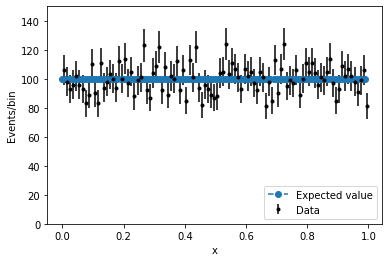

In [38]:
#And so the bins are poisson fluctuated. This is why when we plot data in a histogram we put error bars 
#Corresponding the poission uncertainty in a bin
N=10000
nbins=100
sample  = np.random.uniform (0,1,N)
histy, bin_edges = np.histogram(sample, bins=nbins)
yerr=np.sqrt(histy)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.set_ylim([0,2*N/nbins])

#Here is the command
plt.errorbar(bin_centers,histy,yerr=yerr,marker='.',c='black',linestyle = 'None',label='Data')

k=np.arange(0,1,0.01)
vals=np.full((100),N/nbins)
plt.plot(k,vals,'o--',label="Expected value")
plt.ylim(0,150)
plt.xlabel("x")
plt.ylabel("Events/bin")
plt.legend(loc='lower right')
plt.show()

## 2.3 Normal(Gaussian) Distribution

The above Poisson distribution is a very powerful distribution. However, we often view it as a subset of the Normal or Gaussian distribution, given by the form: 

\begin{equation}
\mathcal{N}(x,\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}

It has the very important properties, that you can derive yourselves: 
\begin{equation}
E[N(x,\mu,\sigma]=\mu \\
V[N(x,\mu,\sigma]=\sigma^2 \\
\end{equation}

It is effectively a Poisson distribution where the variance is now not $\sigma=\lambda$, but instead a free parameter $\sigma$. It is ofen viewed as a generalized version of the Poisson distribution. There are many names for this distribution. Mathematicians and statistician's often call this the normal distribution. The public frequently refer to this as the bell curve. Physicists call this the Gaussian distribution. These notes will refer to it as Gaussian, since Normal can be easily confused (especially with non-native English speakers). 

While the Gaussin distribution looks simple, there are several things to notice about it. The most important is that the CDF

\begin{equation}
\mathcal{N}(x,\mu,\sigma)=\int_{x}^{\infty} \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{(u-\mu)^2}{2\sigma^2}} du
\end{equation}

does not have a closed analytic form. In fact, we have to integrate this numerically. What makes the normal distribution so power is that it appears all over the place, let's understand the normal distribution in the context of the most important theorem in all of statistics.


## 2.4 Central Limit Theorem

Recall in lecture 1, we derived the sum distribution of two objects. This gave us a triangle distribution, what happens when we consider the sum of more than just two numbers, some very large set of numbers. 

Summing: 1  numbers with mean: 5.043489704691467  and std-deviation 2.8850630345896224 2.911860138658725


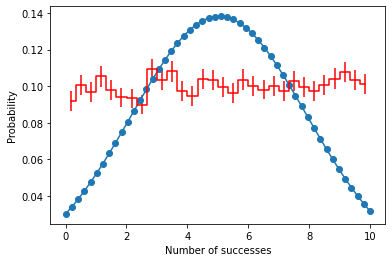

Summing: 2  numbers with mean: 10.063304699069864  and std-deviation 4.072070932573766 4.1083269398122315


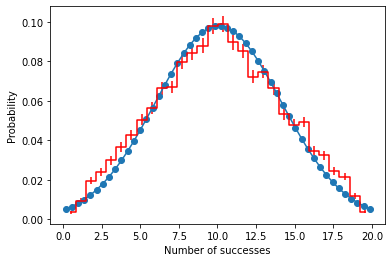

Summing: 3  numbers with mean: 15.056919116698081  and std-deviation 5.000524709362479 5.01897303889936


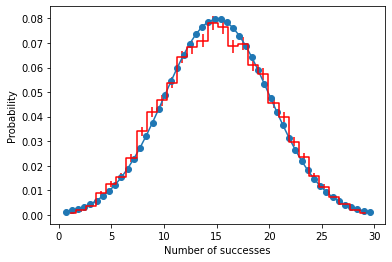

Summing: 4  numbers with mean: 19.999479542854512  and std-deviation 5.785419430641628 5.773352448859733


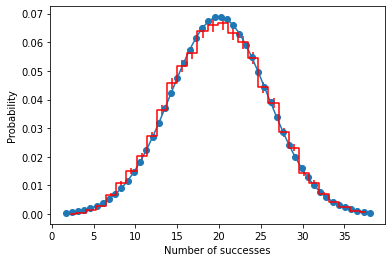

Summing: 50  numbers with mean: 250.00805336380242  and std-deviation 20.357566957600298 20.413072077594116


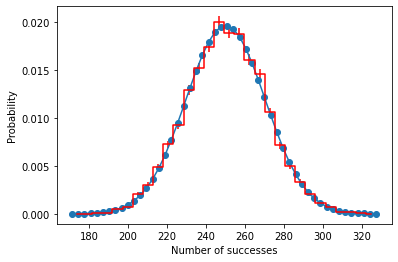

Summing: 5000  numbers with mean: 24998.42559229112  and std-deviation 204.87951912764655 204.11129024681864


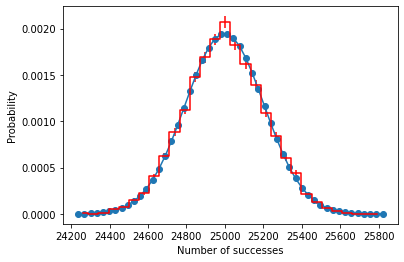

In [41]:
import math

def plotSum(iN):
    ntoys=10000
    sums=np.array([])
    for i0 in range(ntoys):
        pToy = np.random.uniform(0,10,iN)
        sums = np.append(sums,pToy.sum())
    _,_,binrange=normhist(sums) #plots a normalized hist
    k=np.linspace(binrange[0],binrange[-1], 50)
    normal=stats.norm.pdf(k,sums.mean(),sums.std())
    plt.plot(k,normal,'o-')
    plt.xlabel("Number of successes")
    plt.ylabel("Probability")
    print("Summing:",iN," numbers with mean:",sums.mean()," and std-deviation",sums.std(),sums.mean()/math.sqrt(3*iN))
    plt.show()

plotSum(1)
plotSum(2)
plotSum(3)
plotSum(4)
plotSum(50)
plotSum(5000)

So the sum of random numbers drawn from a uniform distribution becomes a Gaussian. This is a very important statement. Effectively, this means that any combination of random variables is a Gaussian distribution, this is crazy. We will not show the full proof here, but suffice it to say, doing the integrals gives yields the same observation. 


Another interesting thing to note is the standard deviation of this Gaussian is incidentally given by the (range of uniform distribution)$/\sqrt{12}$. To verify this, for the last experiment with $N = 5000$ draws, we have

In [46]:
N = 5000
unif_range = 10
print("stddev:", np.sqrt(N * unif_range ** 2 / 12))

stddev: 204.1241452319315


Which matches the standard deviation we obtain numerically. To see this analytically, let's compute it 
\begin{eqnarray}
V[x]&=&\int_{a}^{b}\frac{1}{b-a}\left(x-\frac{b-a}{2}\right)^2 dx\\
V[x]&=&\int_{-a^\prime}^{a^\prime}\frac{1}{2a^\prime}\left(x\right)^2 dx\\
V[x]&=&\frac{1}{2a^\prime}\frac{1}{3}\left(x\right)^3|_{-a^\prime}^{a^\prime} \\
V[x]&=&\frac{2a'^3}{2a^\prime}\frac{1}{3} \\
V[x]&=&\frac{\left(\frac{b-a}{2}\right)^2}{3} \\
V[x]&=&\frac{\left(b-a\right)^2}{12} \\
\end{eqnarray}
So to get the RMS of $N$ random variables summed up we have the variance is given by multiplying by $N$. Further noting that the average of $N$ summed variables gives $\bar{x}=\frac{b-a}{2}$. Combining all of this, we have: 
\begin{eqnarray}
V[x_1+x_2+...+x_N]&=& N \frac{\left(b-a\right)^2}{12}\\
V[x_1+x_2+...+x_N]&=& N \frac{\bar{x}^2}{3}\\
\end{eqnarray}
This is why we can calculate the standard deviation of our sample using the above formula. In any case, we will take this demo as a proof by demo of what we call **the cental limit theorem** which states that **any distribution composed of inputs from a large number of continuous random varibles, the sum tends to a guassian**. For fun, outside of class, go ahead and derive it. Lets compare the Gaussian with a poisson distribution, so we can connect all of our friends together. 

Compare the poission distribution against a normal distribution for $\lambda$=3,15,100. How do these distributions vary? 

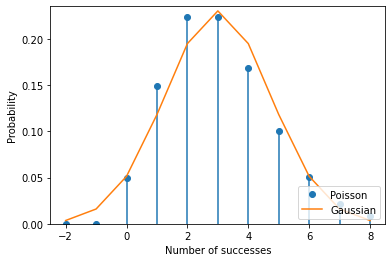

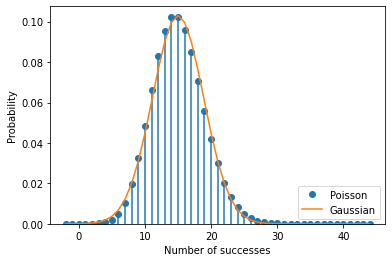

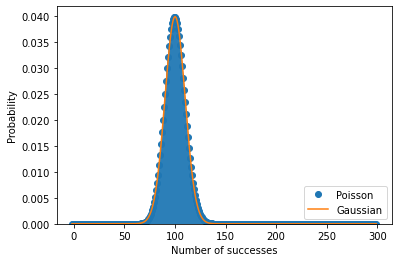

In [42]:
#solution 1
##### Lets plot a Gaussian and poisson with same mean and RMS
def poisGausPlot(n):
    lamb=n
    k=np.arange(-2,3.0*n)
    poisson=stats.poisson.pmf(k,lamb)
    normal=stats.norm.pdf(k,n,math.sqrt(n))
    plt.plot(k,poisson,'o',label='Poisson')
    plt.vlines(k,0, poisson, color=plt.gca().lines[-1].get_color())
    plt.ylim(bottom=0)
    plt.plot(k,normal,'-',label='Gaussian')
    plt.xlabel("Number of successes")
    plt.ylabel("Probability")
    plt.legend(loc='lower right')
    plt.show()

poisGausPlot(3)
poisGausPlot(15)
poisGausPlot(100)

### Challenge Question
Show that the sum of two Gaussian distributions is also Gaussian, what is its variance? 

Summing: 2, numbers with mean: 0.00023411888185333196  and std-deviation 1.4123212413112831


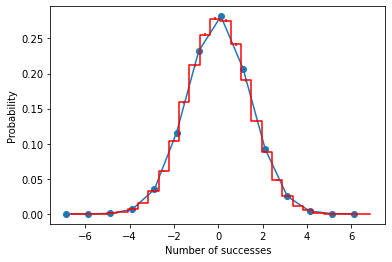

In [43]:
#Generate 2 Gaussian and sum 
ntoys=100000
sums=np.array([])
for i0 in range(ntoys):
    pToy = np.random.normal(0,1,2)
    sums = np.append(sums,pToy.sum())
_,_,binrange=normhist(sums)

k=np.arange(binrange[0],binrange[-1])
normal=stats.norm.pdf(k,sums.mean(),sums.std())

plt.plot(k,normal,'o-')
plt.xlabel("Number of successes")
plt.ylabel("Probability")
print("Summing: 2, numbers with mean:",sums.mean()," and std-deviation",sums.std())
plt.show()
#we expect a standard deviation of sqrt(2), this follows from Var(x1+x2)=N Var(x)

hide_toggle()

<!--start-block-->
<hr style="height: 1px;">

## 2.5 Uncertainties in measurement

In the previous class, we explained expectation is the mean of a distribution, and variance a measure of the width. When we perform a measurement we are are just sampling from an unkown distribution, or worse yet, we are sampling from an unknown distribution and then distorting that distribution with some sort of effect. 

Lets say that you are sampling a distribution that is fundamentally a Gaussian. Consider a sum of random numbers. Now on top of this, we then distort this distribution by a function $f(x)$. This distortion will modify the distribution of the events, making it less gaussian or shrinking and stretching it. A distortion funcation can arise from much things, such as from sending a particle through a magnetic field, or having light reflect off a mirror, there are countless physcial distortive effects. However, if we know $f(x)$ and we know the distribution of $x$, how does this shape of $x$ get distorted by $f(x)$. 

To see that consider the case when the probability of the input distribution is $p(x)$. If we define $x^{\prime}=f(x)$,  the probability to be in small region $dx^\prime$ of the modified coordinates is defined by 
\begin{eqnarray}
p^{\prime}(x^\prime)dx^\prime&=&f(p(x))dx^\prime \\
                             &=&f(p(x))\frac{dx^\prime}{dx}dx\\
                             &=&f(p(x))\frac{df}{dx}dx\\
\end{eqnarray}
This follows from the fact that the spread of a function sampled from $p(x)$ would be modified by the spread of $f(x)$ defined as  $f(x+\Delta x)-f(x)\approx\frac{df}{dx}\Delta x$. 

As a simple example, in the case of $f(x)=x^{2}$ or $\frac{df}{dx}=2x$. What that means is that $\sigma_{f(x)}\approx2x\sigma_{x}$. Lets actually see that empirically.

<br>
<!--end-block-->


Mean: 9982.8604175213 Stddeviation: 205.71451344236988
Predicted Mean: 10000 Stddeviation: 200


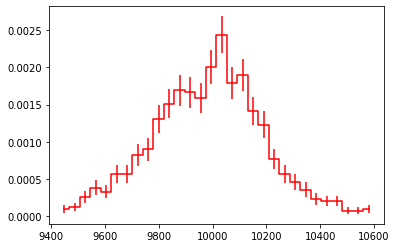

In [44]:
#Now lets say we do a measurement, and the measurement takes an input variable that is varying, 
#and applies a function to it. What is the spread of the function
ntries=1000
meas = np.full(ntries,100) #The value 100, 1k times
unc  = np.random.normal (0,1, ntries) #a randomly sampled value from a Gaussian with width 1 1k times
meas = meas+unc # the value 100 now smeared with sigma=1

def function(ix):#our function
    return ix**2
outmeas = function(meas)
_,_,_=normhist(outmeas)

print("Mean:",outmeas.mean(),"Stddeviation:",outmeas.std())
print("Predicted Mean:",function(100),"Stddeviation:",2*100) #expect it to be 2*100*1

Now what about if we have two uncertainties? This is a little bit different in the sense that these variations are independent of each other. Lets consider the very simple function $f(x)=x$, now lets say that $x$ can vary by a Gaussian distributed variable $\sigma_1$ and a second Gaussian distributed variable $\sigma_2$. If we consider these variations, we have that $f(x)$ will be modified by
\begin{equation}
 f(x) = x + \sigma_1 + \sigma_2
\end{equation}
This will give us two Gaussians. If we look to see the variance of this distribution, we can treat these two fluctuations as two independent measurements, which means we can write. 
\begin{eqnarray}
 V[f(x)] &=& V(x) + V(\sigma_1) + V(\sigma_2)\\
                &=& \sigma_1^2 + \sigma_2^2 
\end{eqnarray}

To visualize what is going on, we can imagine plotting these variations in a 2D plot. 


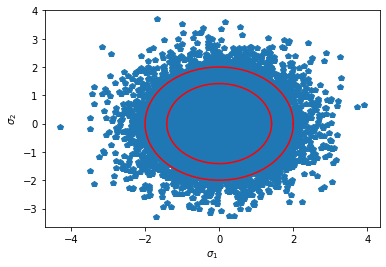

In [45]:
ntoys=10000
err1=np.array([])
err2=np.array([])
for i0 in range(ntoys):
    pToy = np.random.normal(0,1,2)
    err1 = np.append(pToy[0],err1)
    err2 = np.append(pToy[1],err2)
angle = np.linspace( 0 , 2 * np.pi , 150 ) 
#correct circle
radius = 1*np.sqrt(2)
x = radius * np.cos( angle ) 
y = radius * np.sin( angle ) 
#too large circle
radius = 1*2.0
x2 = radius * np.cos( angle ) 
y2 = radius * np.sin( angle ) 

plt.plot(err1,err2,"p")
plt.plot(x,y,c='r')
plt.plot(x2,y2,c='r')
plt.xlabel("$\sigma_{1}$")
plt.ylabel("$\sigma_{2}$")
plt.show()

Sampling two Gaussians gives us a circular distribution with a width given by the radius of the circle. This radius, can be seen to be the standard deviation of $f(x)$ or the $\sqrt{V[f(x)]}=\sqrt{\sigma_1^2+\sigma_2^2}$, or in otherwords sampling two independent variables the variations add as if they are two separate independent coordinates. This is often denoted as a "Sum in Quadrature". 



### Challenge Question

Show numerically that if $f(x) = \log(x)$  $\sigma_{f(x)} = \frac{df}{dx} \sigma_{x}$

Mean: 4.603821578909486 Stddeviation: 0.050141239927322674
Predicted Mean: 4.605170185988092 Stddeviation: 0.05


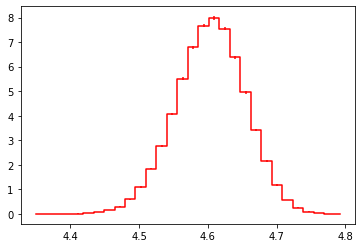

In [46]:
ntries=100000
mean=100
sigma=5
meas = np.full(ntries,mean) #The value 100, 1k times
unc  = np.random.normal (0,sigma, ntries) #a randomly sampled value from a Gaussian with width 1 1k times
meas = meas+unc # the value 100 now smeared with sigma=1

def function(ix):#our function
    return np.log(ix)
outmeas = function(meas)
_,_,_=normhist(outmeas)

print("Mean:",outmeas.mean(),"Stddeviation:",outmeas.std())
print("Predicted Mean:",function(mean),"Stddeviation:",(1./mean)*sigma)

hide_toggle()

## 2.6 Propagating uncertainties in data (a realistic example)

Very famously there was an excess of events at the Tevatron collider in Fermilab. This excess caused a lot of excitement. However many people were skeptical. [Here](https://www.science20.com/quantum_diaries_survivor/no_jetjet_bump_new_cdf_diboson_analysis-123327) is a full description of what was going on. However, I would like to highight this plot here: 

<img src="http://www.pd.infn.it/~dorigo/wjjcdf73fb.jpg" width="300"/>

that people thought was giving a bump for a new particle.  The way this plot is made is in two pieces. First there is a histogram of the data, that is the black points. Second the filled in areas are a histogram of the simualtion. The simulation is of all the other processes that we know are occurring, we then sum them up to get the totall prediction, the colors represent their sub predictions. This is what constitutes the solid distributions, with the different colors representing their relative contributions. Finally, on the right, we subtract the data and the solid distribution, and we get a deviation. The fact that this deviation corresponds to a bump makes us think this is a new particle. The problem with this bump is that it's a bump on a falling distribution. So what would happen if our predicted distribution was shifted to the right by a little bit, how would the bump look?

To see this, lets open a file with this data and try to shift it ourselves. 

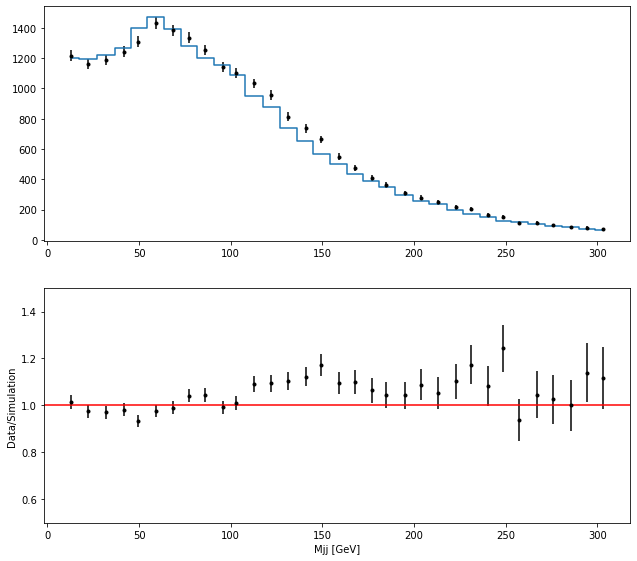

In [71]:
import csv

#load teh file
def load(iName):
    label=iName
    datax=np.array([])
    datay=np.array([])
    datayerr=np.array([])
    with open(label,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')
        for row in plots:
            datax    = np.append(datax,float(row[0]))
            datay    = np.append(datay,float(row[1]))
            datayerr = np.append(datayerr,np.sqrt(float(row[1])))
    return datax,datay,datayerr

#compute the ratio between data and simulation
def histratio(iydata,iyderr,iysim):
    newydata=np.array([])
    newyderr=np.array([])
    for i0 in range(len(iysim)):
        ynew=iydata[i0]/iysim[i0]
        yner=iyderr[i0]/iysim[i0]
        newydata=np.append(newydata,ynew)
        newyderr=np.append(newyderr,yner)
    return newydata,newyderr

fig = plt.figure(figsize=(10.5, 9.5))
ax = fig.add_subplot(2,1,1)
datax,datay,datayerr=load("tmpdata.txt")
simx,simy,simyerr=load("tmpmc.txt")
plt.errorbar(datax,datay,yerr=datayerr,marker='.',c='black',linestyle = 'None')
plt.plot    (datax,simy,drawstyle = 'steps-mid')
ax = fig.add_subplot(2,1,2)
yrdata,yrderr=histratio(datay,datayerr,simy)
ax.errorbar(datax,yrdata,yerr=yrderr,marker='.',c='black',linestyle = 'None')
ax.axhline(1, c='red')
ax.set_ylim(0.5,1.5)
plt.xlabel("Mjj [GeV]")
plt.ylabel("Data/Simulation")
plt.show()


<!--start-block-->

Now we can define a shift a histogram by just shuffling events in bins. This we do by 
\begin{align*}
f(x^{\prime}) & =f(x+\sigma)\approx f(x)+\frac{df}{dx}\sigma\\
 & =f(x)+\frac{f(x+\Delta x)-f(x)}{\Delta x}\sigma\\
 & =f(x)\left(1-\frac{\sigma}{\Delta x}\right)+f(x+\Delta x)\frac{\sigma}{\Delta x}
\end{align*}
Which we can rewrite in terms of bin shifts with a fractional uncertainty of $f=\frac{\sigma}{\Delta x}$ this gives us
\begin{equation}
\rm{bin_{i}} = (1-f)\rm{bin}_{i} + f \rm{bin}_{i-1} \\
f(x_{i}) = f(x_{i})(1-f)+f(x-\Delta x)f
\end{equation}

Let's add this modification and see if a fractional shift can explain our deviation. 

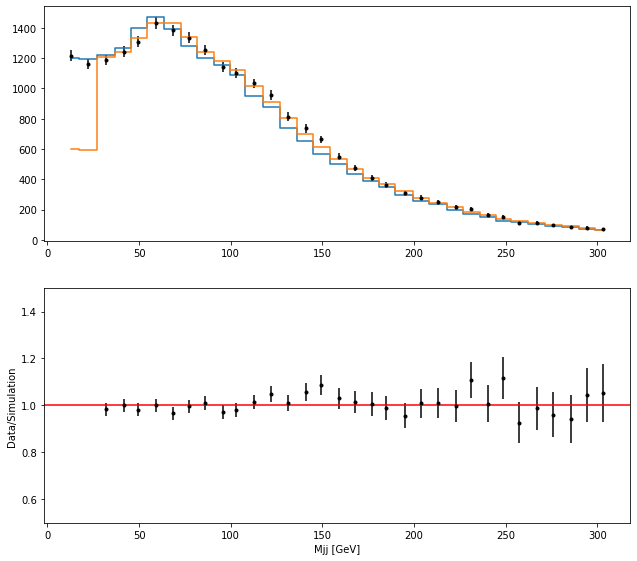

In [72]:
#Now lets shift the bins of the simulatino by a fraction
def shifthist(ixunc,isimy):
    newsimy=np.array([])
    for i0 in range(len(isimy)):
        ynew = isimy[i0]*(1-ixunc)
        if i0 > 1:
            ynew = isimy[i0-1]*ixunc + isimy[i0]*(1-ixunc)
        newsimy=np.append(newsimy,ynew)
    return newsimy

            
fig = plt.figure(figsize=(10.5, 9.5))
ax = fig.add_subplot(2,1,1)
newsimy=shifthist(0.5,simy)
plt.errorbar(datax,datay,yerr=datayerr,marker='.',c='black',linestyle = 'None')
plt.plot    (datax,simy,drawstyle = 'steps-mid')
plt.plot    (datax,newsimy,drawstyle = 'steps-mid')

ax = fig.add_subplot(2,1,2)
yrdata,yrderr=histratio(datay,datayerr,newsimy)
ax.errorbar(datax,yrdata,yerr=yrderr,marker='.',c='black',linestyle = 'None')
ax.axhline(1, c='red')
ax.set_ylim(0.5,1.5)
plt.xlabel("Mjj [GeV]")
plt.ylabel("Data/Simulation")
plt.show()

So a fractional shift of half the bin size is sufficient to explain this effect. Do you believe it is real?